<img src="images/logo.png" style="width: 100px;"/>
<h1><center>Assignment 7</center></h1>
<h3><center>First graded bonus assignment</center></h3>

<center>Due: 23.12.2021 at 23:59</center>

### How to upload:

Upload your solution via the VC course. Please upload **one Zip archive** per group. The Zip must contain:
* Your solution **notebook** (a **.ipynb** file)
* A **data folder** with the datasets (you probably don't have to change anything here)

Your Zip should be named after the following scheme:

* "**yourname**"\_assignment\_"**number**"\_submission.zip


### Please use coding comments!!!
### 60 Points in total

# A) Random Forest (14 points)

You have already worked with decision trees throughout the assignments. This time, instead of implementing algorithms yourself, you are going to use the scikit-learn library to process the data and generate decision trees.

First of all, have a look at the data. Our target will be to determine, based on certain social factors, if a person makes more than $50K a year.

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv("data/adult.csv")
print(data.shape)
data.head()

(32561, 12)


age workclass  education.num marital.status         occupation  \
0   90         ?              9        Widowed                  ?   
1   82   Private              9        Widowed    Exec-managerial   
2   66         ?             10        Widowed                  ?   
3   54   Private              4       Divorced  Machine-op-inspct   
4   41   Private             10      Separated     Prof-specialty   

    relationship   race     sex  capital.gain  capital.loss  hours.per.week  \
0  Not-in-family  White  Female             0          4356              40   
1  Not-in-family  White  Female             0          4356              18   
2      Unmarried  Black  Female             0          4356              40   
3      Unmarried  White  Female             0          3900              40   
4      Own-child  White  Female             0          3900              40   

  income  
0  <=50K  
1  <=50K  
2  <=50K  
3  <=50K  
4  <=50K

This data has to be preprocessed in several ways. First, you can see that there are a few cells containing a `?`, which means that this value is unknown. 

**Task 1 (1 point):**
   1. Find out how many rows contain an unknown value
   2. Remove these rows

In [2]:
#Your solution here
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame(data)

#count12 = df.shape[0]
#print(count12)

df2 = df.replace('?', np.NaN)

#count = df2.isna().sum().sum()
#print(count)
countrow = (df2.isna().sum(axis=1) > 0).sum()
print("Count Row: ", countrow)

#filtered_df = df[df2.notnull()]
df2 = df2.dropna()
df2.head()
#count11 = df2.shape[0]
#print(count11)



Count Row:  1843


age workclass  education.num marital.status         occupation  \
1   82   Private              9        Widowed    Exec-managerial   
3   54   Private              4       Divorced  Machine-op-inspct   
4   41   Private             10      Separated     Prof-specialty   
5   34   Private              9       Divorced      Other-service   
6   38   Private              6      Separated       Adm-clerical   

    relationship   race     sex  capital.gain  capital.loss  hours.per.week  \
1  Not-in-family  White  Female             0          4356              18   
3      Unmarried  White  Female             0          3900              40   
4      Own-child  White  Female             0          3900              40   
5      Unmarried  White  Female             0          3770              45   
6      Unmarried  White    Male             0          3770              40   

  income  
1  <=50K  
3  <=50K  
4  <=50K  
5  <=50K  
6  <=50K

**Task 2 (1 point):** Next, split off the target attribute so that we have to variables `X` and `y` instead of just one dataframe. Also, re-encode `y` so that it has the values `0` and `1` instead of `<=50K` and `>50K`.

In [3]:
target_attribute = 'income'

y_data = df2[target_attribute]
x_data = df2.drop(target_attribute, axis=1)

feature_names = x_data.columns
class_names = y_data.name

y_data = y_data.eq('>50K').mul(1)

y_data.head()

1    0
3    0
4    0
5    0
6    0
Name: income, dtype: int64

Usually, you could now use this data and train a decision tree on it with the ID3-algorithm. Unfortunately, the decision tree algorithms in scikit-learn only works with numerical features, and as you can see from the data inspection, there are still quite a few string features in there. So we need to do more preprocessing.

**Task 3 (1 point):** Perform One-Hot-Encoding on the non-numerical attributes. *Hint: When you use a built-in function from pandas, you can do that in one line.*

In [4]:
#Your solution here
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

categorical_columns = [
    "workclass", "marital.status", "occupation",
    "relationship", "race", "sex"
]
# List of all numerical features
numerical_columns = [
    "age", "education.num",
    "capital.gain", "capital.loss", "hours.per.week"
]

x_data2 = pd.get_dummies(x_data, columns=categorical_columns, drop_first=True)
x_data2.head()

age  education.num  capital.gain  capital.loss  hours.per.week  \
1   82              9             0          4356              18   
3   54              4             0          3900              40   
4   41             10             0          3900              40   
5   34              9             0          3770              45   
6   38              6             0          3770              40   

   workclass_Local-gov  workclass_Private  workclass_Self-emp-inc  \
1                    0                  1                       0   
3                    0                  1                       0   
4                    0                  1                       0   
5                    0                  1                       0   
6                    0                  1                       0   

   workclass_Self-emp-not-inc  workclass_State-gov  ...  \
1                           0                    0  ...   
3                           0                    0  ...   
4                           0                    0  ...   
5                           0                    0  ...   
6                           0                    0  ...   

   relationship_Not-in-family  relationship_Other-relative  \
1                           1                            0   
3                           0                            0   
4                           0                            0   
5                           0                            0   
6                           0                            0   

   relationship_Own-child  relationship_Unmarried  relationship_Wife  \
1                       0                       0                  0   
3                       0                       1                  0   
4                       1                       0                  0   
5                       0                       1                  0   
6                       0                       1                  0   

   race_Asian-Pac-Islander  race_Black  race_Other  race_White  sex_Male  
1                        0           0           0           1         0  
3                        0           0           0           1         0  
4                        0           0           0           1         0  
5                        0           0           0           1         0  
6                        0           0           0           1         1  

[5 rows x 40 columns]

**Task 4 (2 points):** Look at the result from the One-Hot-Encoding. Answer the following questions.
1. What does One-Hot-Encoding do?
2. When you look a bit into the preprocessing-package from scikit-learn, you see that there are other encoders, such as the [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). If you'd use that to transform the data, it would just replace each string value with a numerical value, and your dataframenow would not have as many columns as id does now. What is the problem with the LabelEncoder so that we decided not to use it here?

*Your solution here...*
1. One hot encoding is a process of converting categorical data variables so they can be provided to machine learning algorithms to improve predictions.

2. In label encoding, the model could misunderstand the data to be in some kind of order although there is no order. So, if the categorical feature is not ordinal, we should use OneHotEncoding over LabelEncoding.

The last thing to do before training is to split the dataset into a training- and a test set. Maybe you find a function from scikit-learn that will do that for you.

**Task 5 (1 point):** Use a function fom scikit-learn to split the dataset into training- and test data. The relation should be 70:30.

In [5]:
## Please use this random seed whenever you use a function from sklearn that allows it
from sklearn.model_selection import train_test_split

RANDOM_SEEED = 24

x_train, x_test, y_train, y_test = train_test_split( x_data2, y_data, test_size=0.3, random_state=RANDOM_SEEED)

x_train.head()

age  education.num  capital.gain  capital.loss  hours.per.week  \
22424   59              9             0             0              40   
29882   37             15             0             0              50   
12648   29              9             0             0              40   
31131   23             11             0             0              30   
26677   62              9             0             0              40   

       workclass_Local-gov  workclass_Private  workclass_Self-emp-inc  \
22424                    0                  1                       0   
29882                    0                  0                       0   
12648                    0                  0                       1   
31131                    0                  1                       0   
26677                    0                  1                       0   

       workclass_Self-emp-not-inc  workclass_State-gov  ...  \
22424                           0                    0  ...   
29882                           1                    0  ...   
12648                           0                    0  ...   
31131                           0                    0  ...   
26677                           0                    0  ...   

       relationship_Not-in-family  relationship_Other-relative  \
22424                           0                            0   
29882                           0                            0   
12648                           0                            0   
31131                           0                            0   
26677                           0                            0   

       relationship_Own-child  relationship_Unmarried  relationship_Wife  \
22424                       0                       0                  0   
29882                       0                       0                  0   
12648                       0                       0                  0   
31131                       1                       0                  0   
26677                       0                       0                  0   

       race_Asian-Pac-Islander  race_Black  race_Other  race_White  sex_Male  
22424                        0           0           0           1         1  
29882                        0           0           0           1         1  
12648                        1           0           0           0         1  
31131                        0           0           0           1         0  
26677                        0           0           0           1         1  

[5 rows x 40 columns]

Finally, it is time to do the training! Start with a simple decision tree.

**Task 6 (5 points):**    
A)
   1. Use sklearn's [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) to train a decision tree. Use the entropy as a criterion for splitting. Remember the random seed.
   2. Calculate accuracy and F1-score on both the training and the test set.

In [6]:
#Your solution here
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn import metrics

# 1. Create the decision tree classifier
dtc = DecisionTreeClassifier(splitter = "best", criterion="entropy", random_state=RANDOM_SEEED)

# 2. Train (Fit) the decision tree classifier with your training data
dtc = dtc.fit(x_train,y_train)

# 3. Verify training on training data
score = dtc.score(x_test, y_test)
print(score)

# 4. Test with test data
y_pred = dtc.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# 5. Calculate F1-Score
print(f1_score(y_test, y_pred, average="macro"))

0.8093532986111112
Accuracy: 0.8093532986111112
0.7409010989865557


B) Do the same training again, this time using a Random Forest Classifier instead of a single decision tree.

In [7]:
#Your solution here
from sklearn.ensemble import RandomForestClassifier

# 1. Create the decision tree classifier
rfc = RandomForestClassifier(criterion="entropy", random_state=40)

# 2. Train (Fit) the decision tree classifier with your training data
rfc = rfc.fit(x_train,y_train)

# 3. Verify training on training data
score = rfc.score(x_test, y_test)
print(score)

# 4. Test with test data
y_pred3 = rfc.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

# 5. Calculate F1-Score
print(f1_score(y_test, y_pred3, average="macro"))

0.8481987847222222
Accuracy: 0.8481987847222222
0.7860534209666015


**Task 7 (3 points):** Answer the following questions. As always, please justify your answers.
   1. Which of the two classifiers you trained performs better?
   2. What does a random forest do compared to a single decision tree?
   3. Is the classifier overfitted to the training data? If so, how can you adjust the training to prevent that?

1. Random forest works better than decesion tree.
2. Random forests are a strong modeling technique and much more robust than a single decision tree. They aggregate many decision trees to limit overfitting as well as error due to bias and therefore yield useful results.
3. 

# B) Deep Learning (23 points)

We now want to train a Deep Learning model on an image classification task. For this we will use the framework *Keras*. Keras is a high-level neural network framework that allows straight-forward implementation and experimentation with networks that contain arbitrary layers. 

The framework is embedded in Google's efficient computation framework TensorFlow. So in order to use it, you have to install TensorFlow in the same conda environment you use to open this notebook. You can install it using the command __conda install tensorflow__. If you feel adventurous and have a GPU, you can also install a TensorFlow version with GPU support. For more information on that, see [here](https://www.tensorflow.org/install/gpu).

__Note that GPU support is NOT necessary to solve this task.__ The setup for CUDA and similar libraries can be complicated and lead to very device-specific problems. If you already have CUDA installed and you are getting errors, see the tips and tricks section point 2), there is one common issue we can provide a fix for. 

After installation you can get familiar with the overall workflow in Keras by
reading [this ressource](https://keras.io/guides/sequential_model/).

Feel free to use other tutorials or installation guides. There are many high quality guides freely available online, which contain specific instructions and walkthroughs for your setup and OS. Please contact us if you need any help with that.

We will implement a rather simple convolutional neural network that tackles the task of classifying input images into pre-defined classes. The dataset we
are going to use for this assignment is called *Fashion-MNIST*. It consists of
low-resolution images of 10 clothing categories.

Let us first obtain the dataset:

In [8]:
import tensorflow
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

| Label   | Description |
|:-------:|:------------|
| 0 | T-Shirt/Top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

__Task 1 (1 point):__ Find out the dimensions (width and height) of the images. Show the last image of the train set and determine its label.

<Figure size 1800x1440 with 0 Axes>

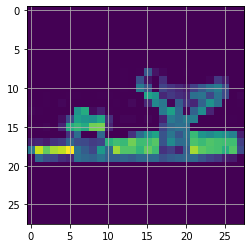

28 28


In [9]:
#Your solution here
#from keras.preprocessing.image import load_img

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))

lastImage = len(train_images)-1
width = -1
height = -1
fig = plt.figure()
plt.imshow(train_images[lastImage])
plt.grid(True)
plt.show()

height, width = train_images[lastImage].shape

print(width, height)



__Task 2 (2 points):__ First of all we need to pre-process the images in a way they can be fed into a Convolutional Neural Network. It is important to think about the dimensions of the images: We've already explored width and height of the images but we also need to consider the color channel. Since the images of the dataset are all grayscale, a single image only has one value for every pixel in its representing 2D array. For Keras this dimensional expansion must be made explicit so that it can incorporate a single color channel. For this purpose the 2D array of an image has to be transformed into a 3D array (height x width x color). Perform this dimension expansion for your training and test images.

Additionally a CNN performs better with small floating point values for the pixel data. Therefore make sure that all your pixel values are normalized to fall in the range between 0.0 and 1.0.

60000


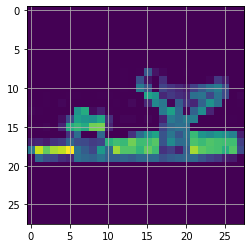

In [10]:
#Your solution here

train_images_trans = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images_trans = test_images.reshape(test_images.shape[0], 28, 28 ,1) 

print(train_images_trans.shape[0])

plt.imshow(train_images_trans[lastImage])
plt.grid(True)
#plt.color(False)
plt.show()

__Task 3 (1 point):__ When looking at the labels of the dataset it is noticeable that they are categorical. In statistics, categorical features are referred to as nominally scaled data. Explain the difference between the nominal scale and ordinal scale. Explain why we argue that the labels are nominally scaled.

*Your solution here...*

__Task 4 (1 point):__ Now transform the labels. *Hint: The __utils__ package of Keras will help you greatly with that.* 

In [11]:
#Your solution here
train_labels_encode = tensorflow.keras.utils.to_categorical(train_labels)
test_labels_encode = tensorflow.keras.utils.to_categorical(test_labels)

__Task 5 (2 points):__ Split the test set into test and validation set using a `test_size` of 0.5. 
What is the validation set for? Explain. 

In [12]:
#Your solution here
valid_image_trans_x, test_image_trans_x, valid_label_trans_y, test_label_trans_y = train_test_split( test_images_trans, test_labels_encode, test_size=0.5)
#print(valid_image_trans_x[0])

*Your solution here...*

__Task 6 (4 points):__ Let us now implement our own Convolutional Neural Network architecture with Keras. Doing so we will start with defining the CNN. After that we can compile it and finally fit it. Define the network's architecture and print out the model summary. The structure has to be the following:
* Input layer that allows for the input of images preprocessed like above
* Convolution layer with 32 filters and a 3x3 weight kernel. Activation: ReLU
* Maxpooling layer using a 2x2 window
* Convolution layer with 64 filters and a 3x3 weight kernel. Activation: ReLU
* Maxpooling layer using a 2x2 window
* Flatten Layer
* Dense layer with 100 neurons and ReLU activation function
* Output layer with the number of output classes and Softmax activation.

In [13]:
#Your solution here
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
                 input_shape=[width, height, 1]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               160100    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

__Task 7 (2 points):__ Explain what a MaxPoolingLayer does and what the `pool_size` is for. Why do you need Pooling Layers in a CNN?

*Your solution here*

__Task 8 (1 point):__ TensorBoard is a helpful tool that visualizes the inner workings of our CNN. Have a look at this link to get to know more about it: [here](https://www.tensorflow.org/tensorboard/). 
Initialize a TensorBoard. For `log_dir` choose a name for the directory where the log entries will later be saved in. The `histogram_freq` should be set to 1.  You will later use it when fitting the CNN. *Hint: Remember the name you chose for your log directory.*

In [14]:
#Your solution here

log_dir = "logs/D-Team"
tensorboard_callback = tensorflow.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

__Task 9 (2 points):__ Let's compile our CNN so that the model is trainable by Keras! During compilation, several hyperparameters will also be given by the user. Compile your model to be trained with the optimizer strategy *Adam*, which is a variation of *Stochastic Gradient Descent*. For *Adam* please use a learning rate of 0.001. For the loss function please use the `categorical_entropy`. For metrics use the `accuracy`.

In [15]:
#Your solution here

from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(),
              optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

__Task 10 (2 points):__ Now we can finally train our model. Train the model for 10 `epochs` with a `batch_size` of 32 with the training data and validate it simultaneously with our validation data with Keras. This can take some time. Don't forget to include the `TensorBoard` you initialized before. *Hint: By setting verbose to 1 you can watch the progress.*

In [16]:
#Your solution here

model.fit(train_images_trans, train_labels_encode, epochs=1, batch_size=32, callbacks=[tensorboard_callback])
test_loss, test_acc = model.evaluate(valid_image_trans_x, valid_label_trans_y)
print('Test accuracy:', test_acc, ', Test loss: ' , test_loss)

Train on 60000 samples
60000/60000 [==============================] - 35s 585us/sample - loss: 0.5911 - accuracy: 0.8247
5000/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test accuracy: 0.857 , Test loss:  0.39672079291343687


__Task 11 (2 points):__ Make use of the TensorBoard you already included above and explore it. Doing so you have to open a terminal in the directory you run this notebook in. Include an image of the main graph that shows the architecture of your CNN as well as an image of the plotted epoch's accuracies. *Hint: You can clear the logs of previous runs: `rm -rf ./theNameYouChoseForLogdir`.*

*Your solution here...*

__Task 12 (3 points):__ Finally, let us make use of the left out test data and evaluate our model again on the test data. Is there a sign of overfitting with respect to the test data? *Hint: Your TensorBoard can help you answering this question.* 

What is a common method to prevent a CNN from Overfitting? How is it done in Keras? 

In [17]:
#Your solution here
test_loss_2, test_acc_2 = model.evaluate(test_image_trans_x, test_label_trans_y)
print('Test accuracy:', test_acc_2, ', Test loss: ' , test_loss_2)

5000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test accuracy: 0.858 , Test loss:  0.4042957636475563



*Your solution here..* 

# C) Word embeddings and Text processing (23 points)
In this part, we will take a look at word embeddings and text processing - very important concepts when it comes to natural language processing (NLP) which is a big part of machine learning.   
We will start slowly with some basics. The goal behind this task is to give you an outlook on what else can be possible.

To do this, we need to download and import a new package called _gensim_. Be sure to install the newest version. _Gensim_ is a powerful text-processing library with a repository of pre-trained models, which we can use.

Be sure to use built-in functions for this task. For this you will have to find the documentation for gensim on your own and research what kind of functions will be helpful to solve the tasks.

__Troubleshooting__: As _gensim_ can download text corpora and text processing models from their repository through a function call, an error could occur when you try to import it. To fix that you can manually install the library _smart_open_ at version _2.0.0_. This should resolve the problem.
- conda install smart_open==2.0.0
- pip install smart_open==2.0.0

__Task 1 (2 points):__ Research on your own, what __Word Embeddings__ are and what `Word2Vec` has to do with that to get a good idea of what we'll be dealing with in the next few tasks. Briefly explain what word embeddings are in your own words.

*Your solution here ...*

The following code will download a Word2Vec model named [_glove_](https://github.com/RaRe-Technologies/gensim-data), which was trained on part with the wikipedia text corpus.

In [1]:
# if this code does not work, try installing  smart_open==2.0.0
import gensim.downloader as api
word2vec = api.load('glove-wiki-gigaword-50')

__Task 2 (2 points)__:    
1) What is the word embedding for the word *fairy*? Print out the array.   
2) Give the most similar words to *fairy* and the same for *dwarf*? Give a short interpretation whether the result makes sense to you.

In [6]:
#Your solution here

print(word2vec["fairy"])
print(word2vec.most_similar("fairy"))
print(word2vec.most_similar("dwarf"))

##

[ 0.78569   0.64257  -1.8083   -0.12119   0.7867    1.1432   -0.38331
 -0.49925  -0.74049  -0.2936   -0.22261   1.4789    0.4704    0.67805
  0.7636    0.068401  0.31114   0.32178  -0.64415   0.032467  0.34853
 -0.10922   0.17731   0.3711    0.81318  -0.44106  -2.0949    0.46532
  0.19196  -0.692     0.8608   -0.11523   0.21572   0.75596  -0.040723
  0.70037  -0.71252  -0.39421  -0.015452 -0.51486  -0.094424 -0.083315
  0.1629   -0.17556   0.086508  0.53572   0.61575  -0.63742   0.28942
 -0.94031 ]
[('tale', 0.8129827976226807), ('cinderella', 0.794160783290863), ('tales', 0.7663724422454834), ('mythology', 0.740109920501709), ('fable', 0.7336713075637817), ('mythological', 0.7311305403709412), ('godmother', 0.7213624715805054), ('romance', 0.7036209106445312), ('ghost', 0.6938849687576294), ('mystery', 0.6938141584396362)]
[('dwarfs', 0.7827088236808777), ('beetles', 0.7118272185325623), ('beetle', 0.6995832920074463), ('milky', 0.6897964477539062), ('galaxies', 0.6772472858428955), (

__Task 3 (2 points)__: Give the most similar words to *fairy* and the same for *dwarf*. Give a short interpretation whether the result makes sense to you.

In [7]:
#Your solution here
print(word2vec.most_similar("fairy"))
print(word2vec.most_similar("dwarf"))

##

[('tale', 0.8129827976226807), ('cinderella', 0.794160783290863), ('tales', 0.7663724422454834), ('mythology', 0.740109920501709), ('fable', 0.7336713075637817), ('mythological', 0.7311305403709412), ('godmother', 0.7213624715805054), ('romance', 0.7036209106445312), ('ghost', 0.6938849687576294), ('mystery', 0.6938141584396362)]
[('dwarfs', 0.7827088236808777), ('beetles', 0.7118272185325623), ('beetle', 0.6995832920074463), ('milky', 0.6897964477539062), ('galaxies', 0.6772472858428955), ('frog', 0.6629710793495178), ('spiny', 0.6629568934440613), ('spider', 0.6621969938278198), ('rodent', 0.6615629196166992), ('lemurs', 0.6598010659217834)]


**Task 4 (1 point):** Now let's find out how similar certain words are. What is a good metric to determine the similarity of words in the vector representation when you focus on the direction of the vectors rather than their length? Briefly explain why.

*Your solution here ...*

A good metric is cosine similarity. In cosine similarity we can focus on the angle between two vectors.

**Task 5 (2 points):** Now use the metric you described above to calculate the similarity between *fairy* and *dwarf*. Can you find a word that is more similar to fairy than dwarf (which is not in the list of most similar words)? Can you find a word that is less similar to fairy than dwarf? Give us the words and the corresponding similarity scores. Interpret the result.

*Hint: See if you can find a built-in function to do the similarity calculation for you.*

In [9]:
#Your solution here
word2vec.similarity('fairy', 'dwarf')

0.51255673

**Task 6 (3 points):** One advantage of context-based word embeddings is the fact that you can do basic arithmetic operations on them like summation or subtraction and still achieving "somewhat" sound results. Try this out by adding the word "good" to "fairy" and thus recieving a word embedding for a "good fairy". Print the resulting word embedding.

Second: Find out what words are most similar to a "good fairy". Do you find the results sensible? Explain very briefly.

In [8]:
#Your solution here


Up to now you used a pretrained word embedding. With gensim it is pretty easy to train your own word embeddings! You will now use your knowledge to train your own models. We give you a little head start with the correct packages and reading in, processing and tokenizing the text.

We use a fairytale text but if you like you can fiddle around with your own. The fairytale text was taken from Project Guttenberg and is a collection of fairy tales by the Grimm Brothers. https://www.gutenberg.org/ebooks/2591

In [10]:
# Python program to generate word vectors using Word2Vec

# importing all necessary modules
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/biancazimmer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
# Reads ‘fairytale.txt’ file
sample = open("data/fairytales.txt", "r")
s = sample.read()

# Replaces escape character with space
f = s.replace("\n", " ")

data = []

# iterate through each sentence in the file
for i in sent_tokenize(f):
    temp = []
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
    data.append(temp)


**Task 7 (1 point):** In the code snippet above we tokenized our text. Research what a tokenizer does in the context of NLP and describe this briefly in your own words.

*Your solution here ...*

**Task 8 (2 points):** There is more than one way to train a word embedding. Research what the method "Continuous Bag of Words" and "Skip Gram" mean, how they work and what their difference is. Explain this in your own words.

*Your solution here ...*

**Task 9 (2 points):**

Now we will use your new found knowledge to first train a CBOW model with the fairytale data. Use a gensim built-in function to train a Word2Vec word embedding with the CBOW method. For the first one try use a window of 5, a size of 100, a minimum count of 1 and train it for 10 epochs.

Now use this model to calculate the similarity between "fairy" and "good" as well as "fairy" and "dwarf". Interpret the values.

In [12]:
# Create CBOW model

# Print results

**Task 10 (2 points):**

Now again use a gensim built-in function to train a Word2Vec word embedding with the Skip Gram method (*Hint: If you chose the right function above there is only one hyperparameter you have to add*). For your first try use a window of 5, a size of 100, a minimum count of 1 and train it for 10 epochs.

Now use this second model to calculate the similarity between "fairy" and "good" as well as "fairy" and "dwarf". Interpret the values.

In [14]:
# Create Skip Gram model

# Print results

**Task 11 (1 point):** Are you surprised that the similarity scores of the two models differ? Explain why or why not.

*Your solution here...*

**Task 12 (3 points):** Now that you have played around with word embeddings a little bit and got to know the theory behind them. What do you think would be good practical examples to use them in the machine learning context. Name three and explain briefly what these examples are and why you think that would be a good use case. Feel free to use the internet for help.

*Your solution here *

# Tips and Tricks

### 1) CUDA issues
One rather common error message concerns a problem with 'cudnn', and a message that the convolution could not be found: "Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above."   
In that case, copy the following code, insert it in the first code field after the description of task 3 begins, remove the '*#*' from all lines, and execute that code field again.

In [ ]:
#from tensorflow.compat.v1 import ConfigProto
#from tensorflow.compat.v1 import InteractiveSession
#config = ConfigProto()
#config.gpu_options.allow_growth = True
#session = InteractiveSession(config=config)

If you are using CUDA with an NVidia RTX 3000-Series GPU, pay very close attention to the "Hardware Requirements" points on [here](https://www.tensorflow.org/install/gpu). Also notice which Tensorflow version you are using, as the older ones may not be compatible with you new GPU.

### 2) Embedding images
You can embed images in a jupyter notebook on two ways: <br/>
First, you can use the IPython kernel to draw an image everytime the code cell is run like shown below.

In [ ]:
from IPython.display import Image
Image("images/logo.png")

Second, you can embed images directly in a Markdown cell as shown below. You can either use markdown syntax or write plain HTML code. Sometimes HTML code is more practical, as you have much finer control over the HTML elements.

1. Markdown syntax:
![title](images/logo.png)
2. HTML syntax
<img src="images/logo.png" style="width: 70px;"/>

If you are having trouble with **markdown images not refreshing after you change them on disk** you need to refresh your browser. The browser chaches images and the old image is still in the cache.